# Exploring DBSCAN

## Importing Libraries


In [4]:
import pandas as pd                         # data manipulation
import numpy as np                          # numerical operations
import matplotlib.pyplot as plt             # basic plotting
import seaborn as sns                       # statistical vizualisation
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import dbscan
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons

## Crescent Moons

We will start our exploration with the classic example of the crescent-moon-shaped clusters.

In [5]:
# Generate crescent moons dataset
blobs = make_moons(500, noise=0.055, random_state=53)[0]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data and transform it
# This is mostly for practice here since the scale should be uniform
blobs_scaled = scaler.fit_transform(blobs)

### Apply *k*-Means and DBSCAN

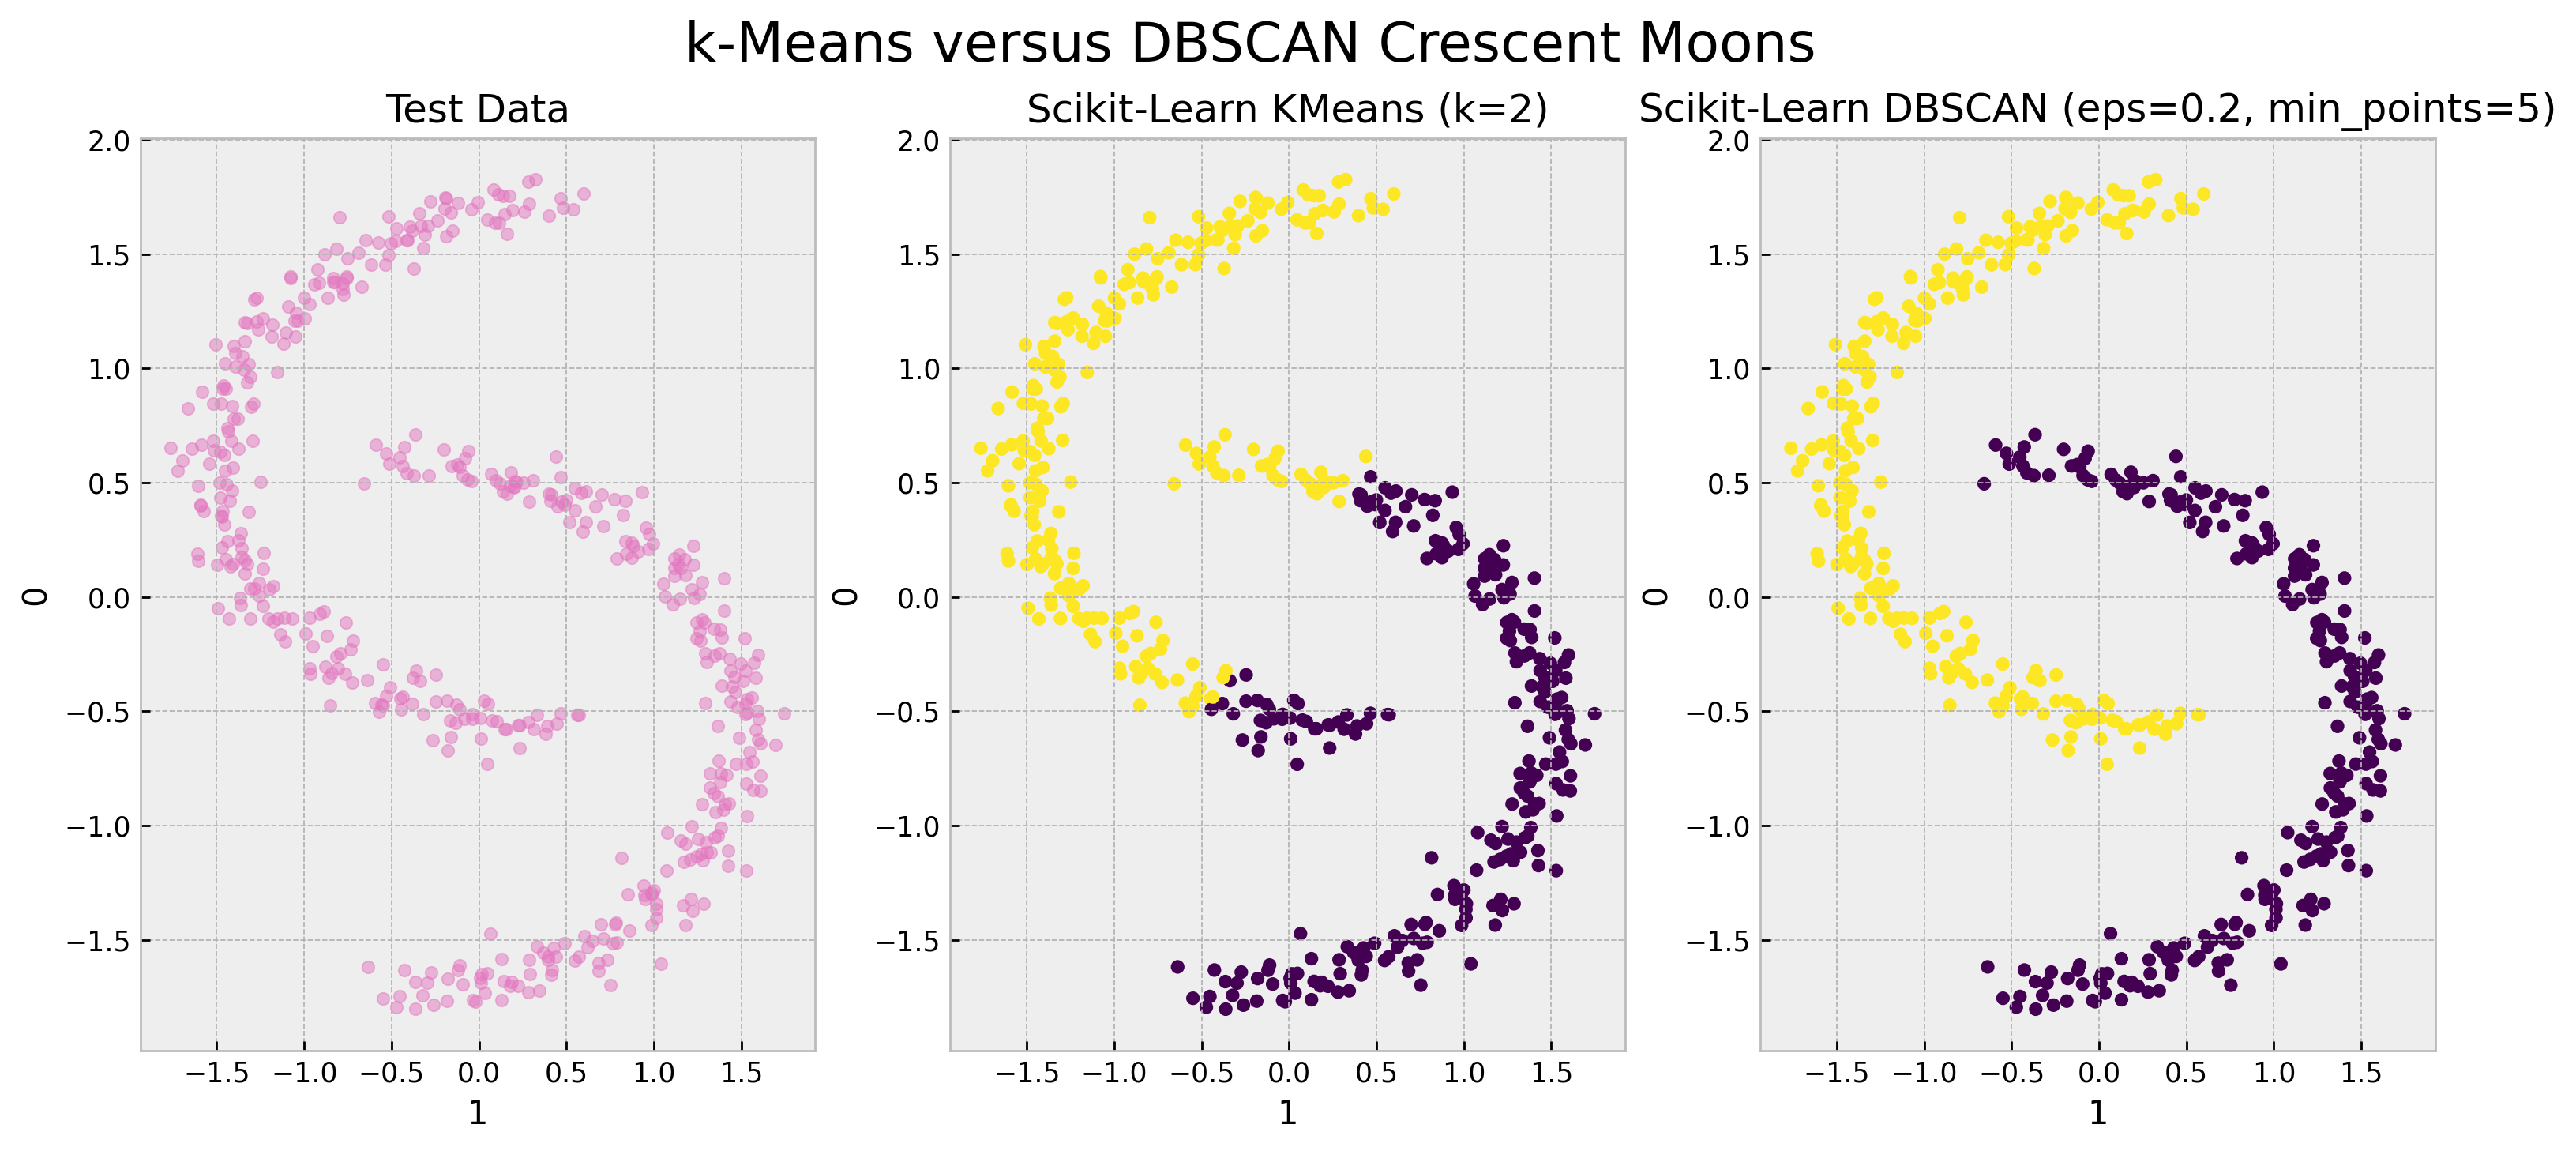

In [6]:
# Use random module to set the state of DBSCAN since it doesn't have a built-in
# random state parameter like k-means does
import random

random.seed(53)

#Plot
plt.style.use("bmh")
fig, ax = plt.subplots(1,3, dpi=250)
fig.suptitle("k-Means versus DBSCAN Crescent Moons", fontsize=20)

# Scikit-Learn KMeans
# Setting k=2
preds_k = KMeans(2, random_state=53).fit(blobs_scaled).labels_
kmean_blob = np.append(blobs_scaled, preds_k.reshape(-1,1), axis=1)
pd.DataFrame(kmean_blob).plot(x=1, y=0, kind="scatter",ax=ax[1], c=2, colorbar=False, title= "Scikit-Learn KMeans (k=2)", marker="o", colormap="viridis")

# Scikit-Learn DBSCAN
# Setting epsilon radius to 0.2 and minimum samples to 5
preds = dbscan(blobs_scaled, eps=0.2, min_samples=5)[1]
dbscan_blob = np.append(blobs_scaled, preds.reshape(-1,1), axis=1)
pd.DataFrame(dbscan_blob).plot(x=1, y=0, kind="scatter", c=2, colorbar=False, ax=ax[2], title= "Scikit-Learn DBSCAN (eps=0.2, min_points=5)", marker="o", colormap="viridis")

# Test Data
pd.DataFrame(blobs_scaled).plot(x=1, y=0, kind="scatter", ax=ax[0], alpha=0.5, figsize=(15,6), title="Test Data", marker="o", c="#e377c0")

plt.show()

### Exploring the Effect of ε (epsilon)

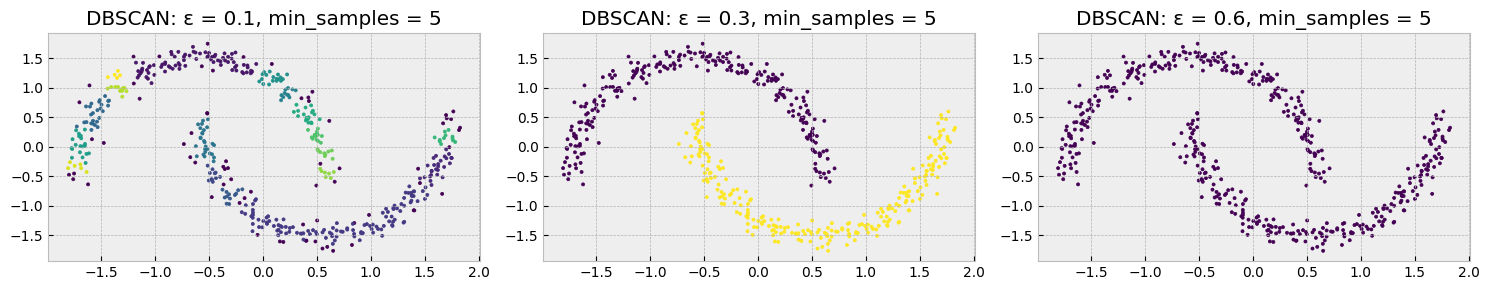

In [7]:
# Explore different epsilon values with a fixed min_samples
epsilon_values = [0.1, 0.3, 0.6]
min_samples = 5

plt.figure(figsize=(15, 3))
for i, eps in enumerate(epsilon_values):
    labels = dbscan(blobs_scaled, eps=eps, min_samples=min_samples)[1]
    plt.subplot(1, 3, i+1)
    plt.scatter(blobs_scaled[:, 0], blobs_scaled[:, 1], c=labels, cmap='viridis', s=5)
    plt.title(f"DBSCAN: ε = {eps}, min_samples = {min_samples}")

plt.tight_layout()
plt.show()

### Analysis:

What happened?

1. **ε = 0.1:** Clusters are fragmented with many noise points.  
2. **ε = 0.3:** Ideal for this dataset, accurately captures the crescent shapes.  
3. **ε = 0.6:** Clusters merge into a single cluster.

**Key Insight:**  
- **Increasing ε** increases the neighborhood size and may merge clusters.  
- **Decreasing ε** creates fragmented clusters with more noise.

### Exploring the Effect of min_samples

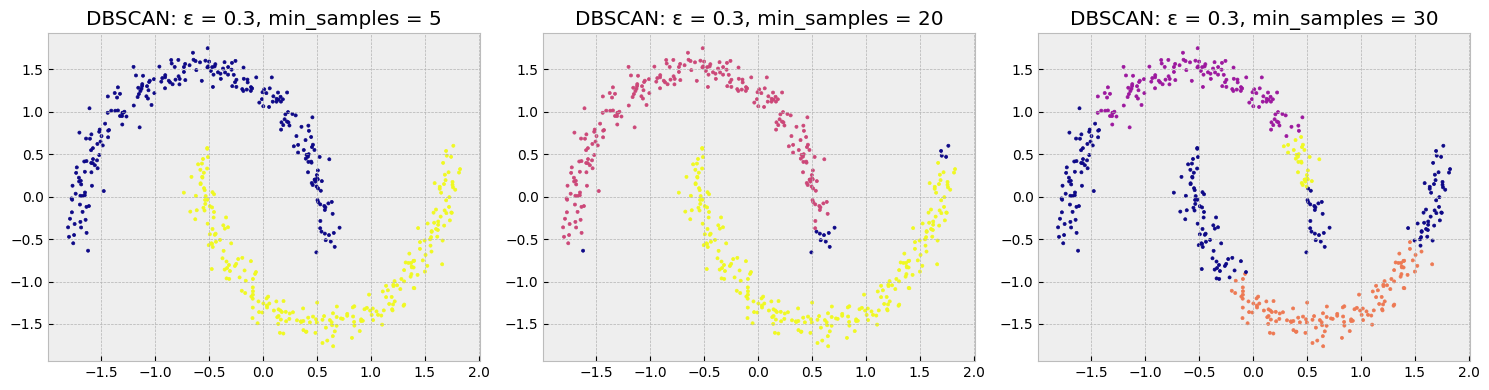

In [8]:
# Explore different min_samples values with a fixed epsilon
eps = 0.3
min_samples_values = [5, 20, 30]

plt.figure(figsize=(15, 4))
for i, ms in enumerate(min_samples_values):
    labels = dbscan(blobs_scaled, eps=eps, min_samples=ms)[1]
    plt.subplot(1, 3, i+1)
    plt.scatter(blobs_scaled[:, 0], blobs_scaled[:, 1], c=labels, cmap='plasma', s=5)
    plt.title(f"DBSCAN: ε = {eps}, min_samples = {ms}")

plt.tight_layout()
plt.show()

### Analysis:

What happened?

1. **min_samples = 5:**
2. **min_samples = 20:**
3. **min_samples = 30:**

**Key Insight:**  
- **Increasing min_samples** requires denser regions to form clusters.  
- **Decreasing min_samples** allows more points to be considered core points, increasing noise.

## Loading Our Data

Let's explore some real-world data from San Francisco with tree data from city streets.

In [9]:
# mount Google Drive
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Specify the folder you want to access
project_folder = "/content/drive/My Drive/Colab Notebooks"

Mounted at /content/drive


In [10]:
file_path = os.path.join(project_folder, "Street_Tree_List_20250107.csv")

trees_df = pd.read_csv(file_path)

In [11]:
# Display the first few rows
trees_df.head()

,TreeID,qLegalStatus,qSpecies,qAddress,SiteOrder,qSiteInfo,PlantType,qCaretaker,qCareAssistant,PlantDate,...,YCoord,Latitude,Longitude,Location,Fire Prevention Districts,Police Districts,Supervisor Districts,Zip Codes,Neighborhoods (old),Analysis Neighborhoods
0,225873,DPW Maintained,Koelreuteria bipinnata :: Chinese Flame Tree,822 Alabama St,1.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaN,...,2.104279e+06,37.758462,-122.411593,"(37.75846190721876, -122.41159276561366)",2.0,4.0,7.0,28859.0,19.0,20.0
1,133842,DPW Maintained,Platanus x hispanica :: Sycamore: London Plane,3170 California St,1.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaN,...,2.115022e+06,37.787404,-122.446379,"(37.787403655494266, -122.44637901807063)",13.0,6.0,1.0,29490.0,31.0,31.0
2,3119,DPW Maintained,Platanus x hispanica :: Sycamore: London Plane,3170 California St,3.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaN,...,2.115015e+06,37.787381,-122.446532,"(37.787380880159084, -122.44653244062533)",13.0,6.0,1.0,29490.0,31.0,31.0
3,3120,DPW Maintained,Platanus x hispanica :: Sycamore: London Plane,3170 California St,4.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaN,...,2.115012e+06,37.787374,-122.446592,"(37.787373511112456, -122.4465917751871)",13.0,6.0,1.0,29490.0,31.0,31.0
4,272733,DPW Maintained,Fraxinus uhdei :: Shamel Ash: Evergreen Ash,590 Masonic Ave,4.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaN,...,2.110904e+06,37.776091,-122.446402,"(37.77609111946836, -122.44640232649878)",15.0,5.0,11.0,29492.0,16.0,18.0


Explanation:
- We focus on columns related to species and location.
- Latitude and Longitude need cleaning before clustering.

### Clean Latitude and Longitude Data

Issues Identified:
- Missing values in Latitude and Longitude.
- Location column stores coordinates as a string like:

"(37.75846190721876, -122.41159276561366)"

Solution:
- Fill missing Latitude/Longitude by parsing the Location string.
- Remove invalid rows.

In [12]:
import re

# Function to extract latitude and longitude from Location string
def extract_lat_lon(location_str):
    try:
        # Match pattern: (lat, lon)
        match = re.match(r"\(([-\d.]+), ([-\d.]+)\)", str(location_str))
        if match:
            return float(match.group(1)), float(match.group(2))
    except (ValueError, TypeError):
        pass
    return None, None

# Apply extraction and fill missing lat/lon values
lat_lon_data = trees_df.apply(
    lambda row: extract_lat_lon(row['Location']) if pd.isna(row['Latitude']) or pd.isna(row['Longitude']) else (row['Latitude'], row['Longitude']),
    axis=1
)

# Convert the resulting Series of tuples into two columns
trees_df['Latitude'], trees_df['Longitude'] = zip(*lat_lon_data)

# Remove rows with missing or invalid coordinates
trees_clean = trees_df.dropna(subset=['Latitude', 'Longitude'])
trees_clean = trees_clean[(trees_clean['Latitude'].between(37.5, 37.9)) &
                          (trees_clean['Longitude'].between(-123, -122))]

# Verify the cleaned data
trees_clean[['Latitude', 'Longitude']].describe()

,Latitude,Longitude
count,195264.000000,195264.000000
mean,37.759624,-122.434645
std,0.024248,0.029905
min,37.509004,-122.511257
25%,37.740116,-122.454129
50%,37.760144,-122.431293
75%,37.779567,-122.412801
max,37.819928,-122.366622


What'd we do?

- We filtered out rows with coordinates far outside SF's range.

### Visualize Tree Locations

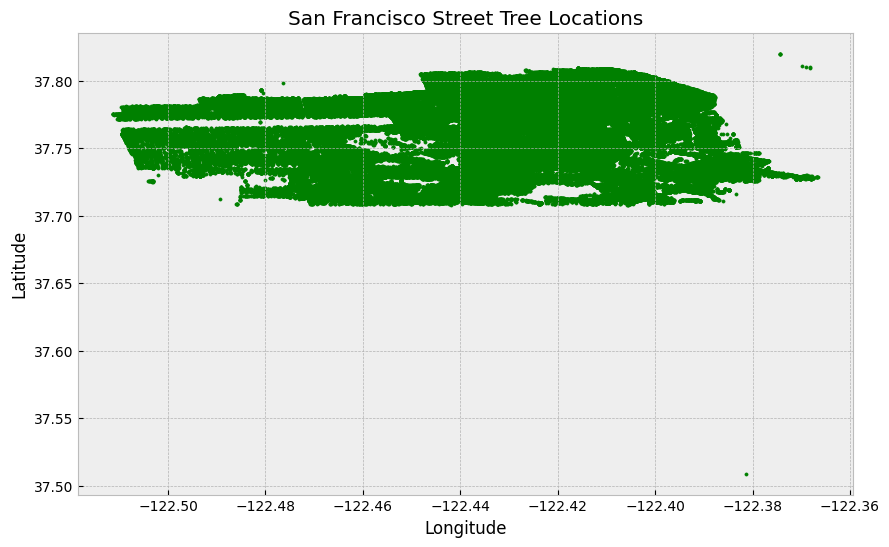

In [13]:
# Plot tree locations
plt.figure(figsize=(10, 6))
plt.scatter(trees_clean['Longitude'], trees_clean['Latitude'], s=5, color='green')
plt.title('San Francisco Street Tree Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

We've got a figure dimension issue...

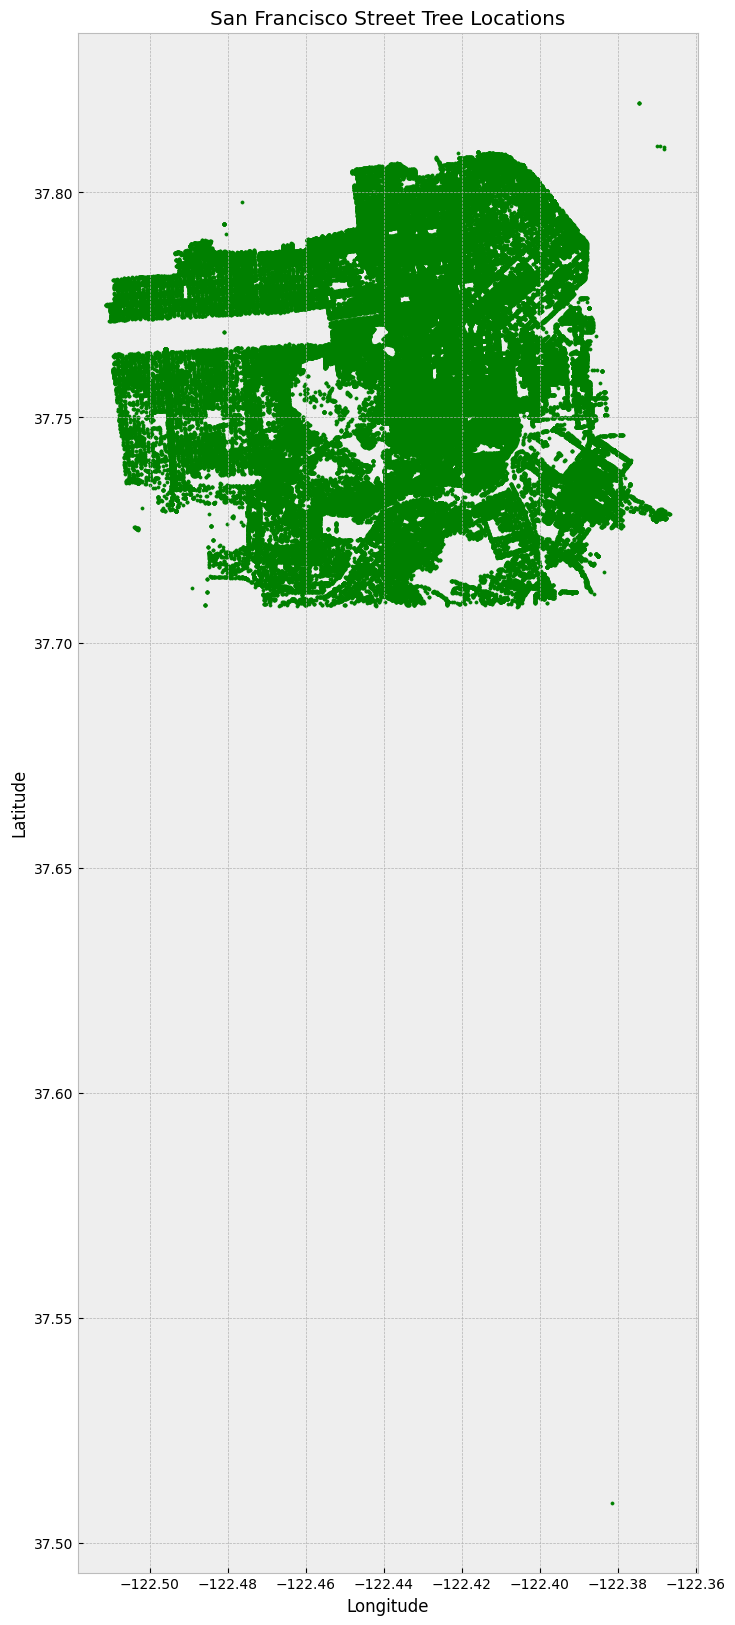

In [14]:
# Plot tree locations
plt.figure(figsize=(8,20))
plt.scatter(trees_clean['Longitude'], trees_clean['Latitude'], s=5, color='green')
plt.title('San Francisco Street Tree Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Apply *k*-Means

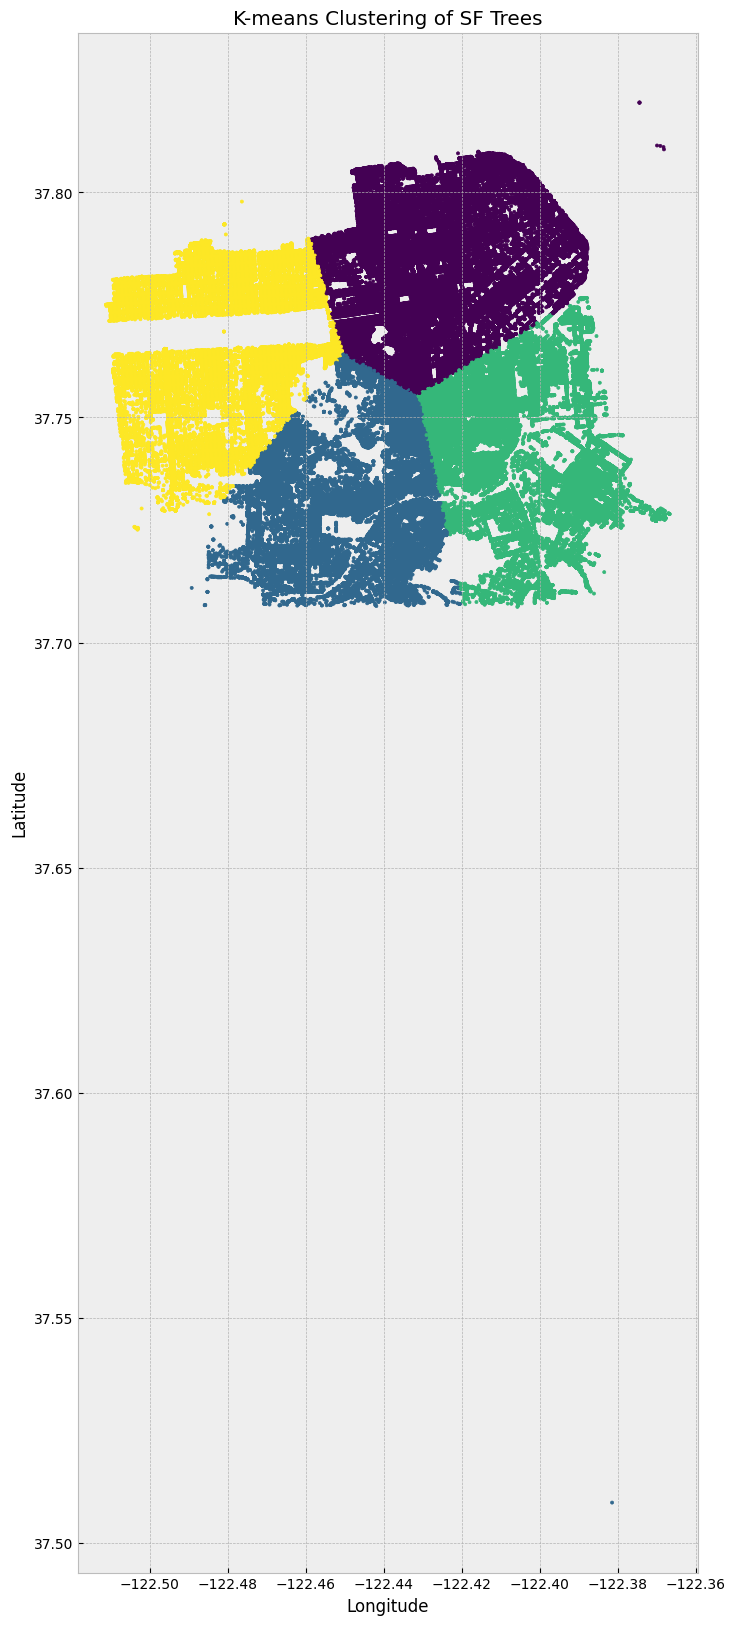

In [15]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
trees_clean['kmeans_cluster'] = kmeans.fit_predict(trees_clean[['Longitude', 'Latitude']])

# Plot K-means clusters
plt.figure(figsize=(8, 20))
plt.scatter(trees_clean['Longitude'], trees_clean['Latitude'], c=trees_clean['kmeans_cluster'], cmap='viridis', s=5)
plt.title('K-means Clustering of SF Trees')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Apply DBSCAN

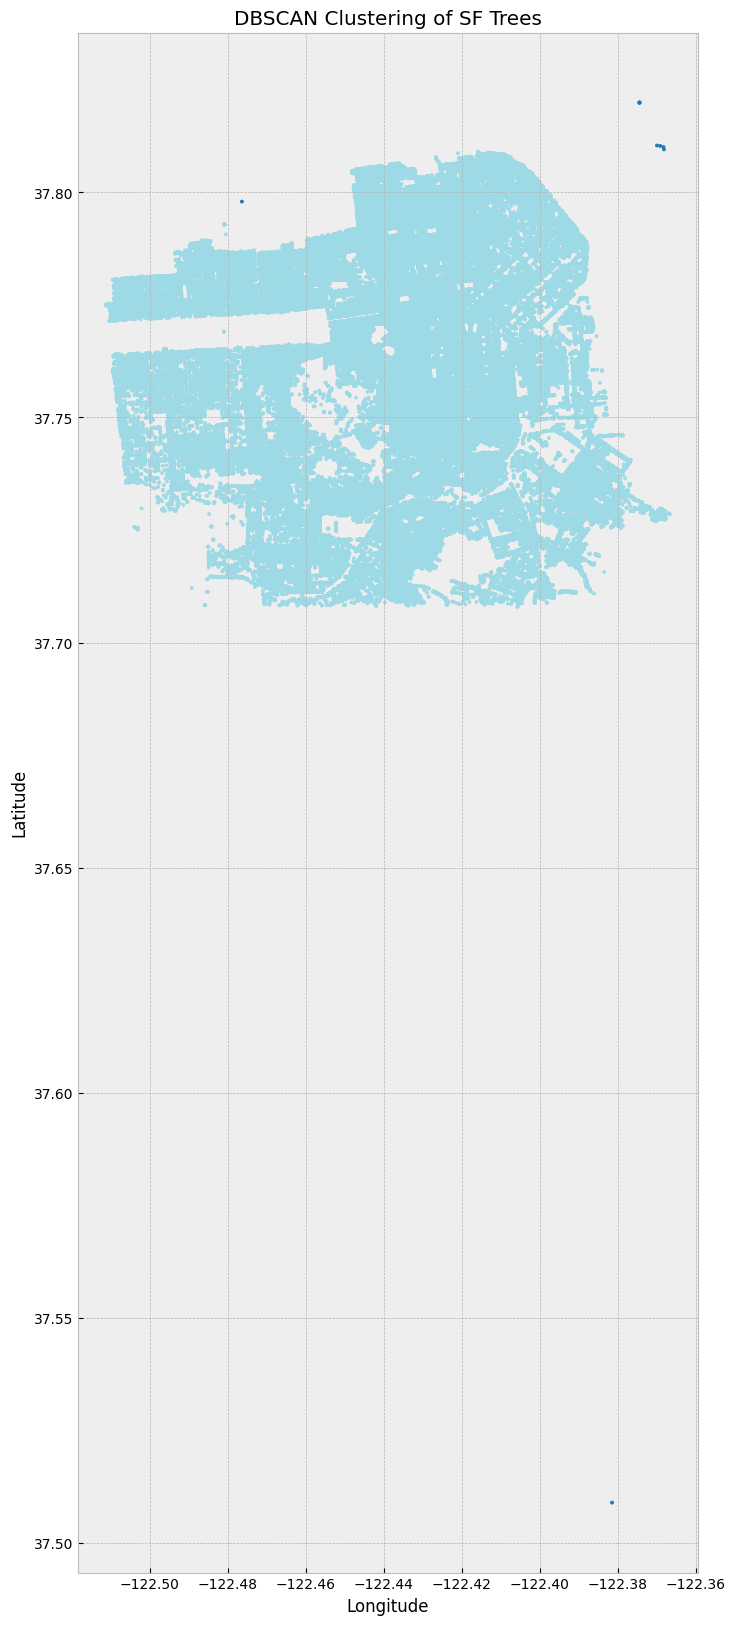

In [18]:
from sklearn.cluster import dbscan

# Apply DBSCAN with initial parameters
# Pass the data matrix as the first argument
clusters = dbscan(X=trees_clean[['Longitude', 'Latitude']],
                 eps=0.005,
                 min_samples=10)  # 0.005 ~500m

# The dbscan function returns a tuple - the second element is the cluster labels
trees_clean['dbscan_cluster'] = clusters[1]

# Plot DBSCAN clusters
plt.figure(figsize=(8, 20))
plt.scatter(trees_clean['Longitude'], trees_clean['Latitude'],
           c=trees_clean['dbscan_cluster'], cmap='tab20', s=5)
plt.title('DBSCAN Clustering of SF Trees')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

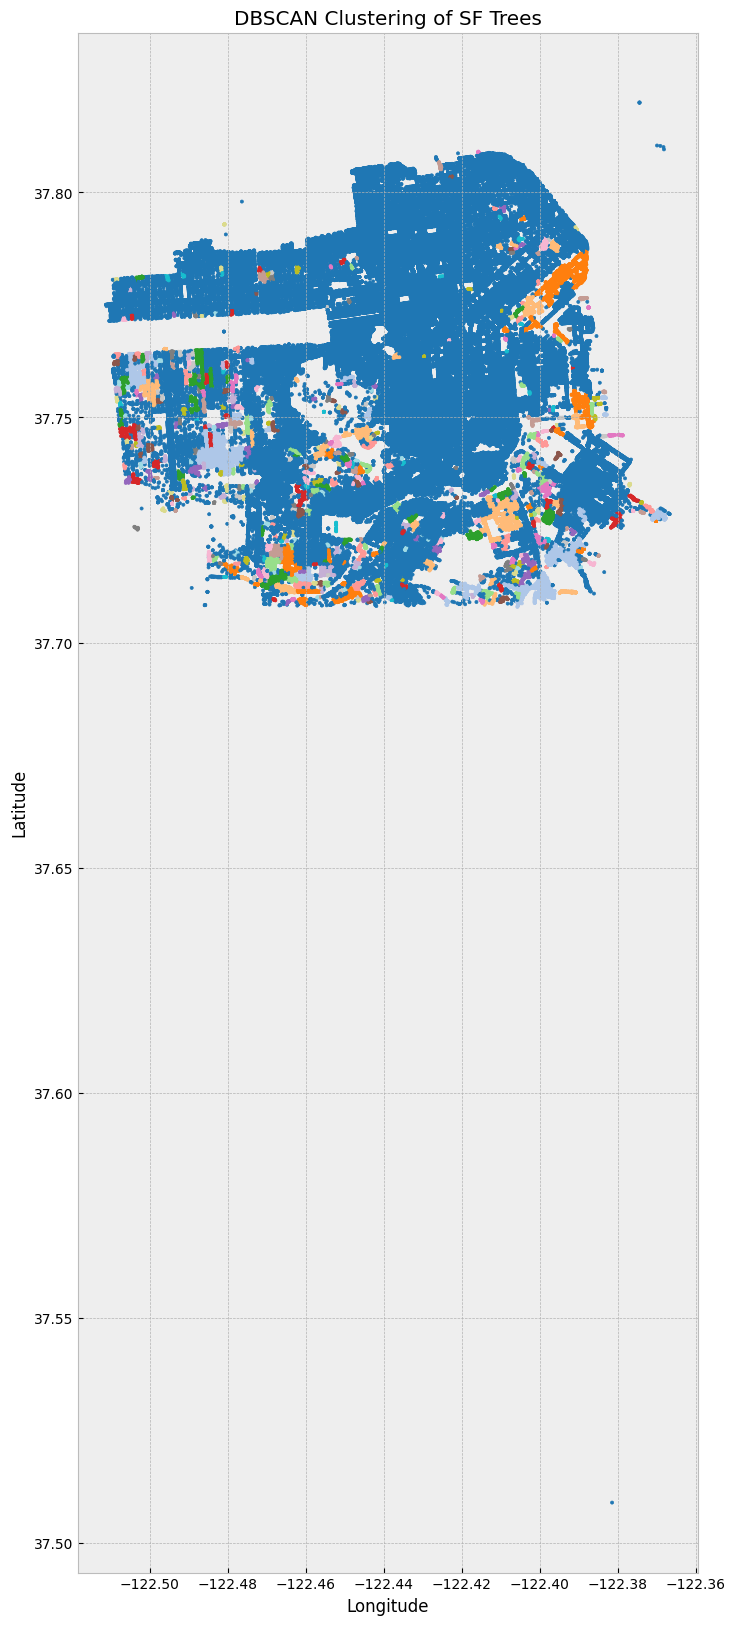

In [20]:
from sklearn.cluster import dbscan

# Apply DBSCAN with initial parameters
# Pass the data matrix as the first argument
clusters = dbscan(X=trees_clean[['Longitude', 'Latitude']],
                 eps=0.0005,
                 min_samples=10)  # 0.005 ~500m

# The dbscan function returns a tuple - the second element is the cluster labels
trees_clean['dbscan_cluster'] = clusters[1]

# Plot DBSCAN clusters
plt.figure(figsize=(8, 20))
plt.scatter(trees_clean['Longitude'], trees_clean['Latitude'],
           c=trees_clean['dbscan_cluster'], cmap='tab20', s=5)
plt.title('DBSCAN Clustering of SF Trees')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

[link text](https://)How do the *k*-Means results different from the DBSCAN approach?

What happened?

#### Explore Different Epsilon Values

Adjust the epsilon values with a partner and observe what changes.

#### Explore Different Minimum Samples

Adjust the min_samples values with a partner and observe what changes.

What do you notice as epsilon increases?
- More points are considered neighbors, which can lead to larger clusters. The model may merge smaller clusters into bigger ones.

What do you notice as min_samples increase?
- The data is densed already, no significant change on min_samples increase keeping epsilon same.

Which approach *k*-Means or DBSCAN works best for this data?